In [77]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np



In [12]:
df_cancer = pd.read_csv("CANCER_TABLE.csv")
df_cancer = df_cancer.rename(columns=lambda x: x.strip())

In [53]:
df_cancer["prediction_cancer"] = df_cancer["diameter (cm)"].apply(lambda x: x>7)

In [54]:
true_labels = df_cancer["cancer"]
predicted_labels = df_cancer["prediction_cancer"]
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

       False       1.00      0.85      0.92       807
        True       0.62      1.00      0.77       193

    accuracy                           0.88      1000
   macro avg       0.81      0.93      0.84      1000
weighted avg       0.93      0.88      0.89      1000



In [55]:
TP = ((true_labels==True) & (predicted_labels==True)).sum()
FP = ((true_labels==False) & (predicted_labels==True)).sum()
FN = ((true_labels == True) & (predicted_labels == False)).sum()
TN = ((true_labels == False) & (predicted_labels == False)).sum()

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

True Positives (TP): 193
False Positives (FP): 118
False Negatives (FN): 0
True Negatives (TN): 689


The business meaning is not so hard to understand.....

In [56]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)

True Positive Rate (TPR): 1.0
False Positive Rate (FPR): 0.14622057001239158


TPR is how many of the positive will I recognize.
FPR is how many of the negatives do I get wrong.

In [17]:
accuracy = np.mean(true_labels == predicted_labels)

print("Accuracy:", accuracy)

Accuracy: 0.882


Acc is what is the probability that my prediction is right.

In [18]:
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6205787781350482
Recall: 1.0
F1 Score: 0.7658730158730159


After analyzing your model, "Marvel-Sabres" offered an upgrade to the model: instead of a classified model, the company will provide a model that ranks the biopsies by their chances to represent a cancer patient (in the coming year). A higher ranking biopsy represents a higher likelihood that it is taken from a person who gets cancer in the coming year.

#### Why would such a model be good? Market it to a customer
Well instead of just knowing what we think, you can also get a more accurate representation of what is the probability of a patient to have cancer, and not just get an answer based on a given threshold. If you need we can give you a reasonable threshold as well, spereately.

#### Draw a ROC curve without using scikit-Learn or any other structured function of python that does so

In [70]:
def calculate_TPR(true_labels, predicted_labels):
    TP = ((true_labels==True) & (predicted_labels==True)).sum()
    FN = ((true_labels == True) & (predicted_labels == False)).sum()
    TPR = TP / (TP + FN)
    return TPR


def calculate_FPR(true_labels, predicted_labels):
    FP = ((true_labels == False) & (predicted_labels == True)).sum()
    TN = ((true_labels == False) & (predicted_labels == False)).sum()
    FPR = FP / (FP + TN)
    return FPR

thresholds = np.arange(5,12,0.01)

def get_threshold_TPR_FPR(threshold, values, true_labels):
    predicted_labels = np.array([val > threshold for val in values])
    rates = (calculate_TPR(true_labels, predicted_labels), calculate_FPR(true_labels, predicted_labels))
    return rates


In [71]:
threshold_TPR_FPR = np.array(list(map(lambda thresh: get_threshold_TPR_FPR(thresh, df_cancer["diameter (cm)"], true_labels), thresholds)))
TPR = threshold_TPR_FPR[:,0]
FPR = threshold_TPR_FPR[:,1]

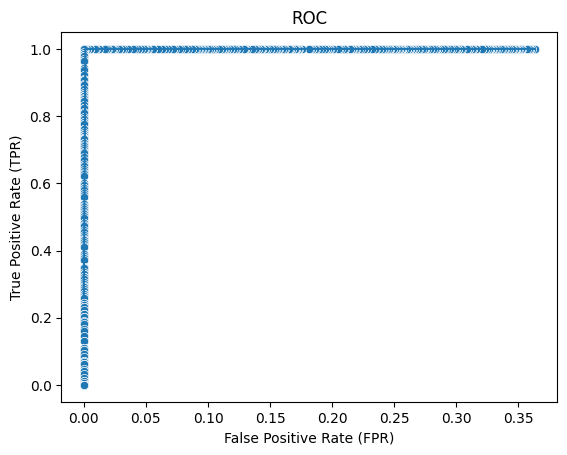

In [75]:
ax = sns.scatterplot(x=FPR, y=TPR)
sns.lineplot(x=FPR, y=TPR)

ax.set_title("ROC")
ax.set_ylabel("True Positive Rate (TPR)")
ax.set_xlabel("False Positive Rate (FPR)")

plt.show()

### Calculate AUC

In [78]:
metrics.auc(FPR,TPR)

0.3630731102850062

In [80]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

0.75

(array([0. , 0. , 0.5, 0.5, 1. ]),
 array([0. , 0.5, 0.5, 1. , 1. ]),
 array([ inf, 0.8 , 0.4 , 0.35, 0.1 ]))